In [1]:
# !pip install tensorflow

In [2]:
import os
import random

import cv2
import matplotlib.image as mpl_img
import matplotlib.pyplot as mpl_plt
import numpy as np
import tensorflow as tf

In [3]:
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPool2D, Flatten, Dense, Dropout)

In [4]:
IMAGE_SIZE = 224
WORKING_IMAGES = r"C:\DEV\IAN\avocado-gis\neural\working-images"
TRAINING_FOLDER_NAME = "training"
VALIDATION_FOLDER_NAME = "validation"
BATCH_SIZE = 32

Verify that Tensorflow is working with local GPU.

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1



Helper Functions.

In [7]:
def view_random_image(target_directory, target_class):
    target_folder = os.path.join(target_directory, target_class)
    image = random.sample(os.listdir(target_folder), 1)[0]

    full_path = os.path.join(target_folder, image)
    read = mpl_img.imread(full_path)
    mpl_plt.imshow(read)
    mpl_plt.title(target_class)

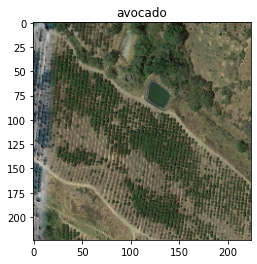

In [8]:
sample_path = os.path.join(WORKING_IMAGES, "training")
view_random_image(sample_path, "avocado")

In [9]:
def load_image(path):
    image = cv2.imread(path)
    image = image / 255.
    return image

In [10]:
def predict_and_plot(model, path, class_names):
    image = load_image(path)
    prediction = model.predict(tf.expand_dims(image, axis=0))

    if len(prediction[0]) > 1:
        predicted_class = class_names[prediction.argmax()]
    else:
        predicted_class = class_names[int(tf.round(prediction)[0][0])]

    mpl_plt.imshow(image)
    mpl_plt.title(f"Prediction: {predicted_class}")
    mpl_plt.axis(False)

Data Path Loading and Definition.

In [11]:
train_directory = os.path.join(WORKING_IMAGES, TRAINING_FOLDER_NAME)
validation_directory = os.path.join(WORKING_IMAGES, VALIDATION_FOLDER_NAME)

In [12]:
data_directory = Path(train_directory)
class_names = np.array(sorted([item.name for item in data_directory.glob('*')]))

print(f'Available class names: {class_names}')

Available class names: ['avocado' 'other']


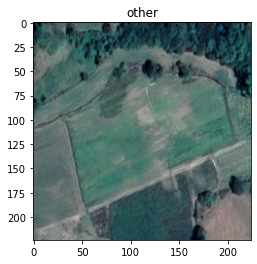

In [13]:
view_random_image(train_directory, random.choice(class_names))

In [14]:
train_data_generator = ImageDataGenerator()
train_data = train_data_generator.flow_from_directory(train_directory,
                                                      target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                      batch_size=BATCH_SIZE,
                                                      class_mode="categorical")

validation_data_generator = ImageDataGenerator()
validation_data = validation_data_generator.flow_from_directory(validation_directory,
                                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                                batch_size=BATCH_SIZE,
                                                                class_mode="categorical")

Found 440 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


Model Architecture Definition

In [18]:
model_a = Sequential([
    Conv2D(3, 3, input_shape=(224, 224, 3)),
    Conv2D(40, 3, activation="relu", use_bias=False, strides=2),
    MaxPool2D(),
    Dropout(0.5),
    Flatten(),
    Dense(2, activation="softmax")])

model_a.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

model_a_history = model_a.fit(train_data,
                              epochs=15,
                              steps_per_epoch=len(train_data),
                              validation_data=validation_data,
                              validation_steps=len(validation_data))

Epoch 1/15
14/14 [==============================] - 2s 113ms/step - loss: 162.7367 - accuracy: 0.5000 - val_loss: 37.8952 - val_accuracy: 0.5096
Epoch 2/15
14/14 [==============================] - 1s 92ms/step - loss: 74.6187 - accuracy: 0.5591 - val_loss: 6.1455 - val_accuracy: 0.8750
Epoch 3/15
14/14 [==============================] - 2s 114ms/step - loss: 30.8581 - accuracy: 0.6864 - val_loss: 37.4799 - val_accuracy: 0.5769
Epoch 4/15
14/14 [==============================] - 1s 105ms/step - loss: 22.2196 - accuracy: 0.7318 - val_loss: 4.3503 - val_accuracy: 0.9327
Epoch 5/15
14/14 [==============================] - 1s 98ms/step - loss: 16.0428 - accuracy: 0.8023 - val_loss: 3.3220 - val_accuracy: 0.9519
Epoch 6/15
14/14 [==============================] - 1s 90ms/step - loss: 17.5930 - accuracy: 0.7705 - val_loss: 3.9423 - val_accuracy: 0.8846
Epoch 7/15
14/14 [==============================] - 1s 96ms/step - loss: 13.4416 - accuracy: 0.8364 - val_loss: 5.3591 - val_accuracy: 0.8750


In [23]:
model_b = Sequential([
    Conv2D(5, 5, input_shape=(224, 224, 3)),
    MaxPool2D(),
    Dropout(0.5),
    Flatten(),
    Dense(2, activation="softmax")])

model_b.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

model_b_history = model_b.fit(train_data,
                              epochs=15,
                              steps_per_epoch=len(train_data),
                              validation_data=validation_data,
                              validation_steps=len(validation_data))

Epoch 1/15
14/14 [==============================] - 2s 108ms/step - loss: 187.7698 - accuracy: 0.5068 - val_loss: 106.5227 - val_accuracy: 0.5000
Epoch 2/15
14/14 [==============================] - 1s 89ms/step - loss: 68.8794 - accuracy: 0.5727 - val_loss: 17.1000 - val_accuracy: 0.7692
Epoch 3/15
14/14 [==============================] - 1s 85ms/step - loss: 61.2104 - accuracy: 0.6182 - val_loss: 2.0491 - val_accuracy: 0.9519
Epoch 4/15
14/14 [==============================] - 1s 83ms/step - loss: 35.7756 - accuracy: 0.6955 - val_loss: 10.1874 - val_accuracy: 0.8462
Epoch 5/15
14/14 [==============================] - 1s 87ms/step - loss: 37.2823 - accuracy: 0.6659 - val_loss: 11.0517 - val_accuracy: 0.8462
Epoch 6/15
14/14 [==============================] - 1s 96ms/step - loss: 31.1411 - accuracy: 0.6909 - val_loss: 4.4973 - val_accuracy: 0.8942
Epoch 7/15
14/14 [==============================] - 1s 96ms/step - loss: 36.3589 - accuracy: 0.6818 - val_loss: 12.8941 - val_accuracy: 0.778

In [22]:
model_c = Sequential([
    Conv2D(3, 3, input_shape=(224, 224, 3)),
    MaxPool2D(),
    Dropout(0.5),
    Flatten(),
    Dense(2, activation="softmax")])

model_c.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

model_c_history = model_c.fit(train_data,
                              epochs=15,
                              steps_per_epoch=len(train_data),
                              validation_data=validation_data,
                              validation_steps=len(validation_data))

Epoch 1/15
14/14 [==============================] - 2s 99ms/step - loss: 61.4133 - accuracy: 0.4909 - val_loss: 10.1875 - val_accuracy: 0.6827
Epoch 2/15
14/14 [==============================] - 1s 88ms/step - loss: 46.8539 - accuracy: 0.5227 - val_loss: 10.7899 - val_accuracy: 0.5673
Epoch 3/15
14/14 [==============================] - 1s 99ms/step - loss: 41.5200 - accuracy: 0.5273 - val_loss: 8.6147 - val_accuracy: 0.7308
Epoch 4/15
14/14 [==============================] - 1s 98ms/step - loss: 37.9086 - accuracy: 0.5136 - val_loss: 30.7651 - val_accuracy: 0.4808
Epoch 5/15
14/14 [==============================] - 1s 83ms/step - loss: 27.3366 - accuracy: 0.5795 - val_loss: 6.4330 - val_accuracy: 0.7500
Epoch 6/15
14/14 [==============================] - 1s 82ms/step - loss: 21.9952 - accuracy: 0.6318 - val_loss: 6.3023 - val_accuracy: 0.7788
Epoch 7/15
14/14 [==============================] - 1s 86ms/step - loss: 26.8899 - accuracy: 0.6295 - val_loss: 10.7718 - val_accuracy: 0.6827
Ep

Performing Predictions on never-seen images.

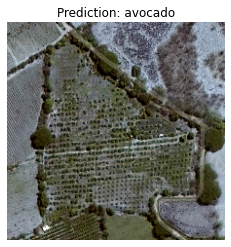

In [26]:
predict_and_plot(model_b, r'C:\DEV\IAN\avocado-gis\neural\testing-images\output\0.png', class_names)

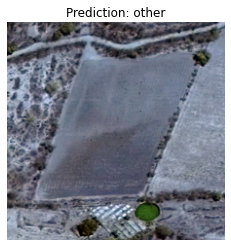

In [27]:
predict_and_plot(model_b, r'C:\DEV\IAN\avocado-gis\neural\testing-images\output\1.png', class_names)